In [1]:
import sys, os

import numpy as np
import pandas as pd
from nptdms import TdmsFile
from dateutil.relativedelta import relativedelta
from datetime import datetime

### plotting libs
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

### some convenient magics
%load_ext autoreload
%autoreload 2


In [ ]:
### Directory setup
cwd = os.getcwd()
datapath = os.path.abspath(os.path.join(cwd, 'dummydata/'))
figpath = os.path.abspath(os.path.join(cwd, 'figs/'))

In [3]:
files = [x for x in os.listdir(datapath) if 'DOE' not in x]
for file in files:
    filename = os.path.join(datapath, file)
    tdms_file = TdmsFile(filename)
    

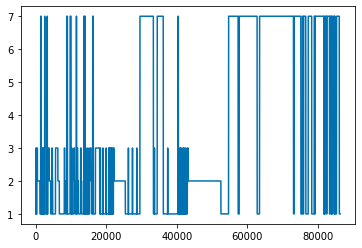

In [4]:
plt.plot(tdms_file.object('SlowData', 'OPC_OpCtl_TurbineStatus').data)

In [5]:
channels = ['LabVIEW Timestamp',
                'WindSpeed_87m',
                'WD1_87m', 
                'WD_Mod_Active',
                'WD_Nacelle',
                'WD_Nacelle_Mod',
                'OPC_OpCtl_TurbineStatus',
                'Active Power',
               ]

dataset = {channel: tdms_file.object('SlowData', channel).data for channel in channels}
dataset['LabVIEW Timestamp'] = [datetime.fromtimestamp(x- 2082844800) for x in dataset['LabVIEW Timestamp']]
dataset = pd.DataFrame.from_dict(dataset)
dataset = dataset.set_index('LabVIEW Timestamp')

In [6]:
dataset['yaw_offfset'] = dataset['WD_Nacelle'] - dataset['WD_Nacelle_Mod']

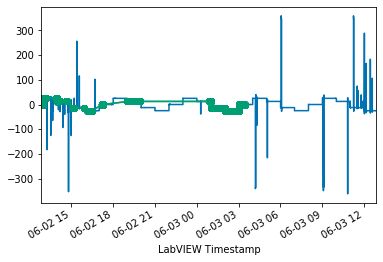

In [73]:
dataset['yaw_offfset'].plot()
dataset['yaw_offfset'][dataset['OPC_OpCtl_TurbineStatus'] == 2].plot(c='C1')
dataset['yaw_offfset'][dataset['Active Power'] > 1].plot(marker='o')


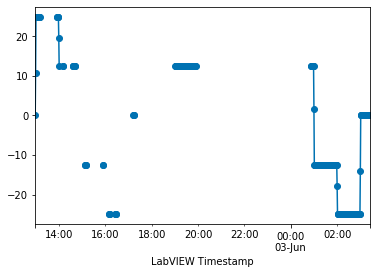

In [50]:
tmp = dataset[dataset['Active Power'] > 1].resample('1T').mean()

tmp['yaw_offfset'].plot(marker='o')

In [60]:
bins = np.array([-27.5, -22.5, -15, -10, -2.5, 2.5, 10, 15, 22.5, 27.5])
labels = np.array([-25, 'garba', -12, 'garbn', 0, 'garbc', 12, 'garbd', 25])
yawbin = pd.cut(tmp['yaw_offfset'], bins=bins, labels=labels)
# tmp = tmp.merge(yawbin)

In [63]:
tmp2 = tmp.copy()
tmp2['yawbin'] = yawbin

In [67]:
tmp2 = tmp2[tmp2['yawbin'].str.contains('garb') == False].astype(np.float)

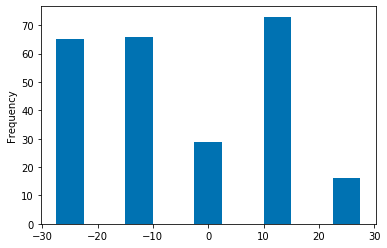

In [72]:
tmp2.yawbin.plot.hist(bins=bins, )

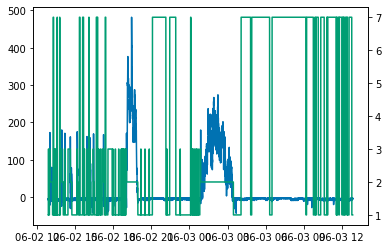

In [29]:
fig,ax = plt.subplots()

ax2=ax.twinx()
ax2.plot(dataset['OPC_OpCtl_TurbineStatus'], c='C1')

ax.plot(dataset['Active Power'], zorder=10)

In [74]:
dummy = np.array([-18.0,0.0,18.0,25.0])


In [75]:
import string
strlist = string.ascii_lowercase

In [88]:
binedges

[-20.5, -15.5, -2.5, 2.5, 15.5, 20.5, 22.5, 27.5]

In [100]:
binlabels = ['garb'] * len(dummy)
binlabels = [x+'_{}'.format(ii) for ii,x in enumerate(glist)]

binlabels = [x for x in zip(dummy, binlabels)]
binlabels = [item for t in binlabels for item in t][:-1]

In [101]:
binlabels

[-18.0, 'garb_0_0', 0.0, 'garb_1_1', 18.0, 'garb_2_2', 25.0]